In [11]:
import numpy as np
from problem_reductions.max_arb_to_ising import *   
from max_arb.exchange_rate_matrix import *
from max_arb.solution_analysis import *
import computing, results_annalysis
from max_arb.constraint_matrix import *
import matplotlib.pyplot as plt

## Fetch the real exchange rate matrix from Binance

In [2]:
exchange_rate_matrix, coins = exchange_rate_matrix()

In [10]:
# exchange_rate_matrix = np.log(exchange_rate_matrix)
# ex_rate_flat = exchange_rate_matrix.flatten()
exchange_rate_matrix = exchange_rate_matrix[:,:]

In [14]:
n, _ = exchange_rate_matrix.shape
n**2

306916

In [4]:
np.set_printoptions(threshold=np.inf)
print(exchange_rate_matrix)

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]


In [5]:
# exchange_rate_matrix[np.isnan(exchange_rate_matrix)]
n, _ = np.shape(exchange_rate_matrix)
n**2

9

## Create an artificial (small), exchange rate matrix

In [4]:
# exchange_rate_matrix = np.array([[np.nan, 1.1, np.nan], [np.nan, np.nan, 1.0], [1.0, np.nan, np.nan]])


# Initialize a 9x9 numpy matrix
exchange_rate_matrix = np.ones((9,9))

# Let's say 1 unit of currency i can be exchanged for 1 unit of currency j, i!=j
# Fill the diagonal with 1.0 (since any currency's rate to itself is 1)
np.fill_diagonal(exchange_rate_matrix, 1.0)

# Define the fictive exchange rates
# From currency 1 to 2
exchange_rate_matrix[0][1] = 0.9
# From currency 2 to 3
exchange_rate_matrix[1][2] = 0.9
# And from currency 3 back to 1
exchange_rate_matrix[2][0] = 1.2


exchange_rate_matrix = np.log(exchange_rate_matrix)
exchange_rate_matrix[np.isnan(exchange_rate_matrix)] = 0
ex_rate_flat = exchange_rate_matrix.flatten()

In [29]:
J, H = max_arb_to_ising(exchange_rate_matrix, 0, 0)

In [30]:
J, H

(array([[ 0., -0.,  0., ...,  0.,  0.,  0.],
        [-0.,  0., -0., ..., -0., -0., -0.],
        [ 0., -0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0., -0.,  0., ...,  0.,  0.,  0.],
        [ 0., -0.,  0., ...,  0.,  0.,  0.],
        [ 0., -0.,  0., ...,  0.,  0.,  0.]]),
 array([ 0.        , -0.01621731,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.01621731,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.07683797,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        

# Fetch Chahin's test matrix

In [3]:
epsilon=0.01
matr=np.array([[1,1.1,0.8,1-epsilon],[1/1.1-epsilon,1,0.9,1/0.9-epsilon],[1/0.8-epsilon,1/0.9-epsilon,1,1.1],[1,0.9,1/1.1-epsilon,1]])
J, H = usage(10,20,4,matr)

In [4]:
J.shape, H.shape

((12, 12), (12,))

# Solve

In [5]:
n_itterations=600
step = 1

def a(self, t):
    a0=0
    return 0
    if t<70:
        return -0.1
    else:
        return 0.2


def temperature(self, t):
    tau = n_itterations/1
    # temp = 10*(1-np.exp(-1/tau*(t-1)))
    temp = 0.01*np.log(10*t)
    # return temp
    return 0

states, energies, path = computing.compute_single_instance(instance_size=12, step=0.01, n_itterations=n_itterations, n_cond_init=50, J=J, H=H, savetofile=False, temperature=temperature, a=a)

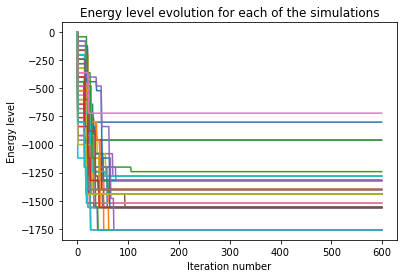

In [6]:
results_annalysis.plot_energies_evolution(energies)

In [12]:
speeds = states[:, :, :220, 1]
positions = states[:, :, :220, 0]
n_cond_init, n_particle,  n_iterration = speeds.shape 
abcisses = np.arange(n_iterration)

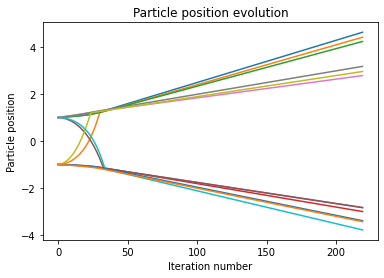

In [13]:
for i in range(n_particle):
    plt.plot(abcisses, positions[1, i, :])
    plt.xlabel("Iteration number")
    plt.ylabel("Particle position")
    plt.title("Particle position evolution")

In [7]:
results_annalysis.extract_full_solution(states, energies)[1]

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
_, spins, _= results_annalysis.extract_full_solution(states, energies)

In [44]:
X = 0.5 * (spins + 1)
# n = int(np.sqrt(len(X)))
# X = X.reshape(n, n)

In [45]:
X

array([1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.])

In [46]:
check_valid_solution(X, exchange_rate_matrix)

ValueError: The trade sequence is not a circle. Increase coefficient lambda1 and retry

In [47]:
compute_theorical_proffit(X, exchange_rate_matrix)

0.972